<a href="https://colab.research.google.com/github/sushantkumar-estech/Iris-classification-using-ANN-with-Pytorch/blob/master/iris_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
pwd

'/content'

In [3]:
print(torch.__version__)

1.6.0+cu101


In [4]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [5]:
torch.manual_seed(32)
model = Model()

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Mounting the drive with colab notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/My Drive/ML_Dataset/Pytorch_dataset/iris.csv')

In [10]:
# df = pd.read_csv('D:\Machine Learning_Udemy\9. PyTorch for Deep Learning with Python Bootcamp\Data/iris.csv')

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [12]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


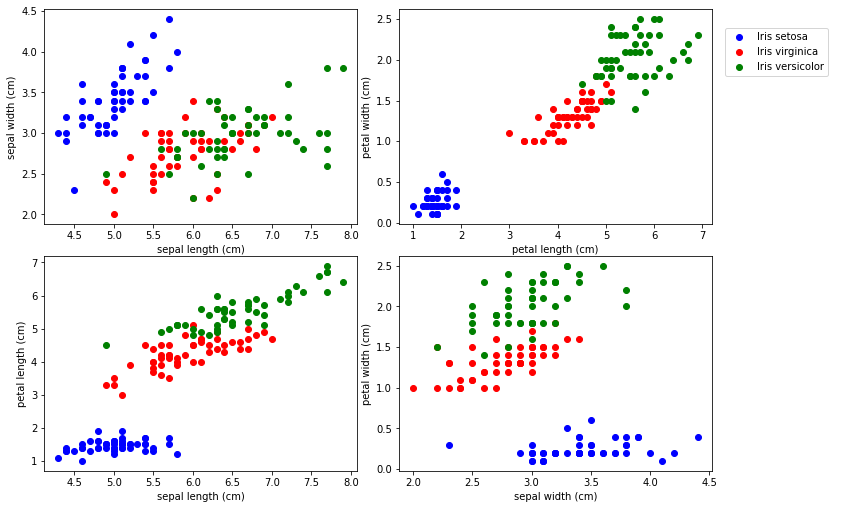

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [14]:
X = df.drop('target', axis=1)
y = df['target']

In [15]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
X = X.values
y = y.values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

In [19]:
# Train_test _split also shuffle our data

In [20]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [21]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [22]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [23]:
model.parameters()

<generator object Module.parameters at 0x7f51e8c80eb8>

In [24]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [25]:
epochs = 100
losses = []

for i in range(epochs):
    
    # forward and get the prediction
    
    y_pred = model.forward(X_train)
    
    # calculate the loss/error
    loss = criterion(y_pred, y_train)
    
    losses.append(loss)
    
    if i%10==0:
        print(f'Epoch {i} and loss is: {loss}') 
    # Backprpagation
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is: 1.1507115364074707
Epoch 10 and loss is: 0.9377315044403076
Epoch 20 and loss is: 0.7798256278038025
Epoch 30 and loss is: 0.6099401712417603
Epoch 40 and loss is: 0.40079933404922485
Epoch 50 and loss is: 0.25436317920684814
Epoch 60 and loss is: 0.15053053200244904
Epoch 70 and loss is: 0.10086943209171295
Epoch 80 and loss is: 0.08128313720226288
Epoch 90 and loss is: 0.07231426984071732


Text(0.5, 0, 'epochs')

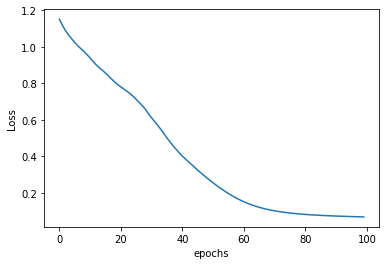

In [26]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

In [27]:
# Evaluating model performance on test set

In [28]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [29]:
loss

tensor(0.0581)

In [30]:
correct = 0

with torch.no_grad():
    
    for i, data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val)} {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct +=1
            
print(f'we got {correct} correct!')

1.) tensor([-2.1252,  4.8064, -0.8628]) 1
2.) tensor([-1.7985,  5.3098, -1.5449]) 1
3.) tensor([  6.3542,   0.8438, -10.0541]) 0
4.) tensor([-3.9123,  4.5958,  1.1693]) 1
5.) tensor([-7.4713,  3.2021,  5.7853]) 2
6.) tensor([-10.4976,   1.6459,   9.6297]) 2
7.) tensor([  6.3201,   0.9917, -10.1532]) 0
8.) tensor([  7.0468,   0.7059, -10.9137]) 0
9.) tensor([-7.2061,  3.3477,  5.3565]) 2
10.) tensor([-9.3960,  2.5759,  8.1033]) 2
11.) tensor([-9.8807,  2.3475,  8.7141]) 2
12.) tensor([ 6.2748,  0.6655, -9.7613]) 0
13.) tensor([-9.3142,  2.1880,  8.1947]) 2
14.) tensor([-3.7803,  4.5050,  1.0752]) 1
15.) tensor([-7.8657,  3.0117,  6.2303]) 2
16.) tensor([-1.8867,  5.1572, -1.3345]) 1
17.) tensor([-5.7006,  3.5030,  3.6696]) 2
18.) tensor([  7.1789,   0.7369, -11.1350]) 0
19.) tensor([-3.2944,  4.7931,  0.3475]) 1
20.) tensor([-7.7665,  3.7629,  5.7095]) 2
21.) tensor([  6.6499,   0.7889, -10.4252]) 0
22.) tensor([  7.4357,   0.8918, -11.6600]) 0
23.) tensor([-9.7584,  2.1744,  8.6654]) 2

In [31]:
torch.save(model.state_dict(), 'my_iris_model_sushant.pt')

In [32]:
new_model = Model()

In [33]:
new_model.load_state_dict(torch.load('my_iris_model_sushant.pt'))

<All keys matched successfully>

In [34]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [35]:
mystery_iris = torch.tensor([5.6, 3.6, 2.2 , 0.5])

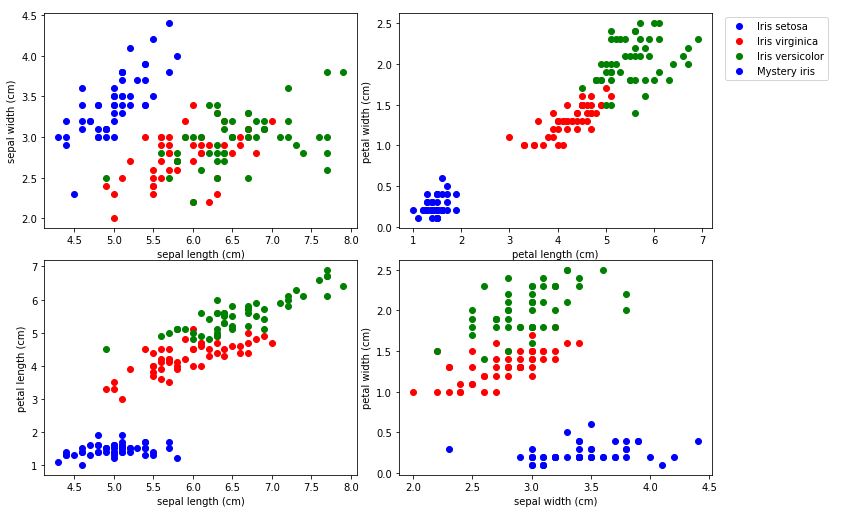

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor', 'Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [37]:
with torch.no_grad():
    print(new_model(mystery_iris))
    print(new_model(mystery_iris).argmax())

tensor([ 5.7598,  1.6343, -9.7669])
tensor(0)
